In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.svm import SVR

In [3]:
#EDA
da=pd.read_csv('hw5_treasury yield curve data.csv')
data=da.dropna()
data=data.iloc[:,1:32]
print('Number of observations:',data.shape[0])
print('Number of variables:',data.shape[1])
data.describe()

Number of observations: 8071
Number of variables: 31


,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


In [4]:
corr_mat=pd.DataFrame(data.corr())
corr_mat

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
SVENF01,1.000000,0.986417,0.958364,0.924637,0.890691,0.860385,0.835864,0.817792,0.805833,0.799116,...,0.818245,0.813380,0.806650,0.798100,0.787826,0.775963,0.762679,0.748167,0.732632,-0.849562
SVENF02,0.986417,1.000000,0.991325,0.971026,0.945906,0.920994,0.899469,0.882818,0.871309,0.864483,...,0.880253,0.875325,0.868506,0.859830,0.849384,0.837300,0.823744,0.808910,0.793006,-0.884194
SVENF03,0.958364,0.991325,1.000000,0.993681,0.978891,0.960996,0.943810,0.929497,0.918916,0.912072,...,0.917414,0.912155,0.905080,0.896211,0.885620,0.873430,0.859797,0.844907,0.828962,-0.898952
SVENF04,0.924637,0.971026,0.993681,1.000000,0.995480,0.985206,0.973186,0.962005,0.952978,0.946523,...,0.935990,0.929804,0.921925,0.912369,0.901202,0.888536,0.874519,0.859327,0.843153,-0.903707
SVENF05,0.890691,0.945906,0.978891,0.995480,1.000000,0.996934,0.990180,0.982494,0.975478,0.969858,...,0.941744,0.934145,0.924980,0.914267,0.902072,0.888503,0.873704,0.857846,0.841114,-0.903779
SVENF06,0.860385,0.920994,0.960996,0.985206,0.996934,1.000000,0.998022,0.993749,0.988922,0.984458,...,0.940299,0.931069,0.920375,0.908243,0.894745,0.879994,0.864134,0.847334,0.829776,-0.902343
SVENF07,0.835864,0.899469,0.943810,0.973186,0.990180,0.998022,1.000000,0.998756,0.996054,0.992905,...,0.936188,0.925358,0.913126,0.899534,0.884664,0.868636,0.851601,0.833730,0.815205,-0.901242
SVENF08,0.817792,0.882818,0.929497,0.962005,0.982494,0.993749,0.998756,1.000000,0.999202,0.997388,...,0.932400,0.920175,0.906572,0.891646,0.875496,0.858251,0.840071,0.821133,0.801622,-0.901317
SVENF09,0.805833,0.871309,0.918916,0.952978,0.975478,0.988922,0.996054,0.999202,1.000000,0.999443,...,0.930524,0.917211,0.902507,0.886484,0.869255,0.850962,0.831773,0.811874,0.791457,-0.902706
SVENF10,0.799116,0.864483,0.912072,0.946523,0.969858,0.984458,0.992905,0.997388,0.999443,1.000000,...,0.931140,0.917093,0.901615,0.884793,0.866751,0.847646,0.827655,0.806972,0.785796,-0.905134


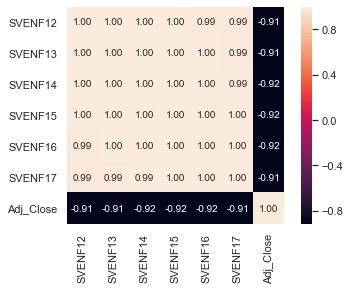

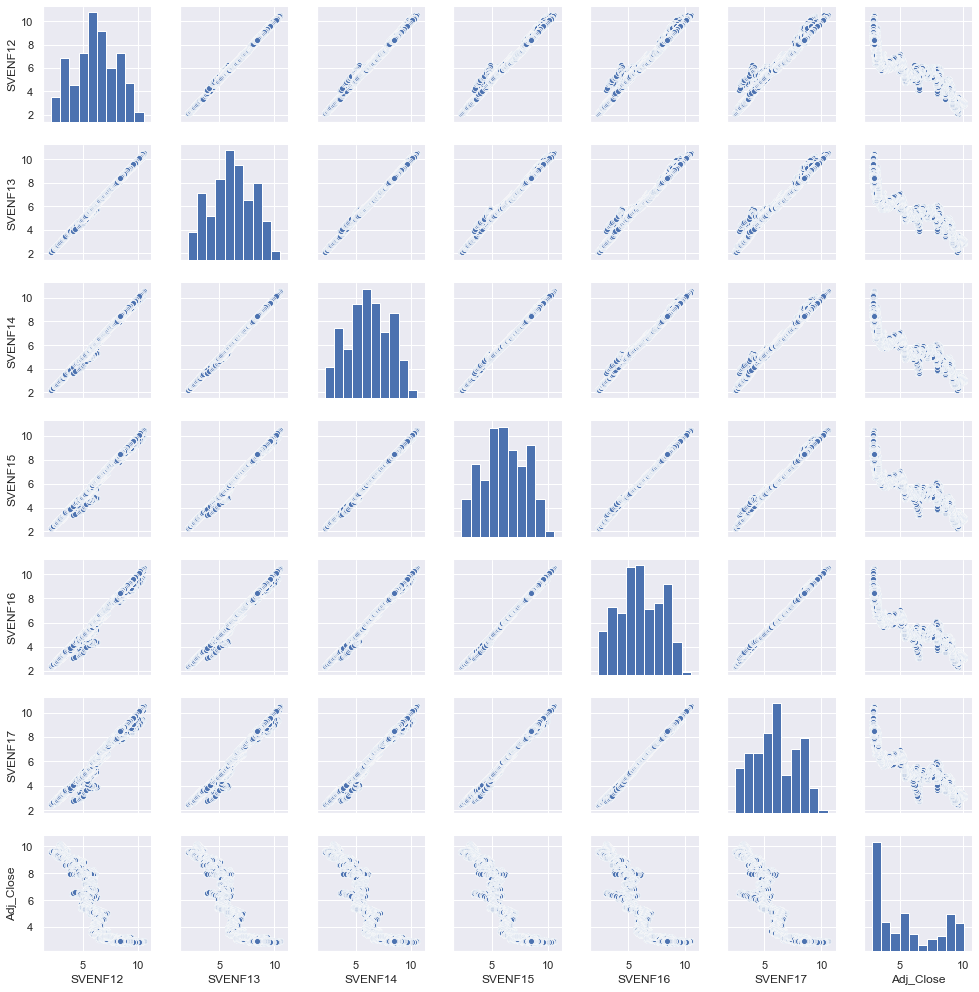

In [5]:
data1=data[['SVENF12','SVENF13','SVENF14','SVENF15','SVENF16','SVENF17','Adj_Close']]
cm=np.corrcoef(data1.values.T)
sns.set(font_scale=1)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=data1.columns,xticklabels=data1.columns)
plt.show()
sns.pairplot(data1,height=2)
plt.show()

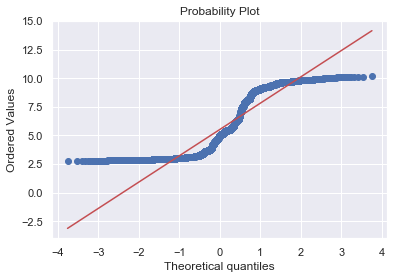

In [6]:
stats.probplot(data.Adj_Close,dist="norm",plot=pylab)
pylab.show()

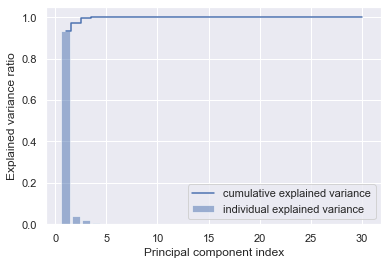

In [7]:
#PCA
X=data.iloc[:,0:30]
y=data.iloc[:,30]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.15,random_state=42)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
model=PCA(n_components=None)
X_train_pca=model.fit_transform(X_train_std)
X_test_pca=model.transform(X_test_std)
cov_mat = np.cov(X_train_pca.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,31), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,31), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

The explained variance ratio of the 3 component pca model is: [0.93067768 0.0418521  0.02150743]
The cumulative explained variance ratio of the 3 component pca model is: [0.93067768 0.97252978 0.99403721]
The explained variance of the 3 component pca model is: [27.89295118  1.25433177  0.64459011]
The cumulative explained variance of the 3 component pca model is: [27.89295118 29.14728294 29.79187305]


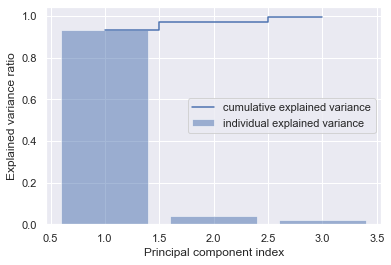

In [14]:
model_new=PCA(n_components=3)
X_train_pca3=model_new.fit_transform(X_train_std)
X_test_pca3=model_new.fit_transform(X_test_std)
print("The explained variance ratio of the 3 component pca model is:", model_new.explained_variance_ratio_)
cum_var_exp_ratio=np.cumsum(model_new.explained_variance_ratio_)
print("The cumulative explained variance ratio of the 3 component pca model is:", cum_var_exp_ratio)
print("The explained variance of the 3 component pca model is:", model_new.explained_variance_)
cum_var_exp=np.cumsum(model_new.explained_variance_)
print("The cumulative explained variance of the 3 component pca model is:", cum_var_exp)
plt.bar(range(1,4), model_new.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,4), cum_var_exp_ratio, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [8]:
#linear classifier model
lr = LogisticRegression()
lr=lr.fit(X_train,y_train)

C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [15]:
%%time
#linear regression model
ln = LinearRegression()
ln.fit(X_train,y_train)
R2_train=ln.score(X_train,y_train)
R2_test=ln.score(X_test,y_test)
print("R2 score for linear regression model in original training sample is",R2_train)
print("R2 score for linear regression model in original testing sample is",R2_test)
y_train_pred=ln.predict(X_train)
y_test_pred=ln.predict(X_test)
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE score for linear regression model in original training sample is",RMSE_train)
print("RMSE score for linear regression model in original testing sample is",RMSE_test)
ln.fit(X_train_pca3,y_train)
R2_train_pca3=ln.score(X_train_pca3,y_train)
R2_test_pca3=ln.score(X_test_pca3,y_test)
print("R2 score for linear regression model in PCA transformed training sample is",R2_train_pca3)
print("R2 score for linear regression model in PCA transformed testing sample is",R2_test_pca3)
y_train_pred_pca3=ln.predict(X_train_pca3)
y_test_pred_pca3=ln.predict(X_test_pca3)
RMSE_train_pca3=np.sqrt(mean_squared_error(y_train,y_train_pred_pca3))
RMSE_test_pca3=np.sqrt(mean_squared_error(y_test,y_test_pred_pca3))
print("RMSE score for linear regression model in PCA transformed training sample is",RMSE_train_pca3)
print("RMSE score for linear regression model in PCA transformed testing sample is",RMSE_test_pca3)

R2 score for linear regression model in original training sample is 0.9022730353400424
R2 score for linear regression model in original testing sample is 0.9041309535337385
RMSE score for linear regression model in original training sample is 0.776653304036992
RMSE score for linear regression model in original testing sample is 0.7823695855057063
R2 score for linear regression model in PCA transformed training sample is 0.8672181160186359
R2 score for linear regression model in PCA transformed testing sample is 0.8636574057368397
RMSE score for linear regression model in PCA transformed training sample is 0.9052935003366371
RMSE score for linear regression model in PCA transformed testing sample is 0.9330147976343556
Wall time: 20.5 ms


In [16]:
%%time
#SVR model
svm = SVR(gamma='auto')
svm.fit(X_train,y_train)
R2_train_svm=svm.score(X_train,y_train)
R2_test_svm=svm.score(X_test,y_test)
print("R2 score for support vector regression model in original training sample is",R2_train)
print("R2 score for support vector regression model in original testing sample is",R2_test)
y_train_pred_svm=svm.predict(X_train)
y_test_pred_svm=svm.predict(X_test)
RMSE_train_svm=np.sqrt(mean_squared_error(y_train,y_train_pred_svm))
RMSE_test_svm=np.sqrt(mean_squared_error(y_test,y_test_pred_svm))
print("RMSE score for support vector regression model in original training sample is",RMSE_train_svm)
print("RMSE score for support vector regression model in original testing sample is",RMSE_test_svm)
svm.fit(X_train_pca3,y_train)
R2_train_pca3_svm=svm.score(X_train_pca3,y_train)
R2_test_pca3_svm=svm.score(X_test_pca3,y_test)
print("R2 score for support vector regression model in PCA transformed training sample is",R2_train_pca3_svm)
print("R2 score for support vector regression model in PCA transformed testing sample is",R2_test_pca3_svm)
y_train_pred_pca3_svm=svm.predict(X_train_pca3)
y_test_pred_pca3_svm=svm.predict(X_test_pca3)
RMSE_train_pca3_svm=np.sqrt(mean_squared_error(y_train,y_train_pred_pca3_svm))
RMSE_test_pca3_svm=np.sqrt(mean_squared_error(y_test,y_test_pred_pca3_svm))
print("RMSE score for support vector regression model in PCA transformed training sample is",RMSE_train_pca3_svm)
print("RMSE score for support vector regression model in PCA transformed testing sample is",RMSE_test_pca3_svm)

R2 score for support vector regression model in original training sample is 0.9022730353400424
R2 score for support vector regression model in original testing sample is 0.9041309535337385
RMSE score for support vector regression model in original training sample is 0.17842978247829994
RMSE score for support vector regression model in original testing sample is 0.17921441181600534
R2 score for support vector regression model in PCA transformed training sample is 0.9900739080853601
R2 score for support vector regression model in PCA transformed testing sample is 0.9880248199717424
RMSE score for support vector regression model in PCA transformed training sample is 0.24751933829343314
RMSE score for support vector regression model in PCA transformed testing sample is 0.27651187085248075
Wall time: 3.37 s
